# TRABALHO (EP2) - ANÁLISE DE DADOS - PROFº FERNANDO MASSANORI

# ADS 1 - TURMA A

# Alunos: Cleber Willians da Silva & José Francisco Forneiro Júnior

O assunto abordado foi referente a roubo de veículos em São José dos Campos no ano de 2018. E para tal finalidade foram extraídos dados do site da Secretaria do Estado de São Paulo.

Observação: Verificado que nem todos os campos são preenchidos pelas vítimas. Sendo assim, pode ser que se tenha algumas distorções, mas é de entendimento que os resultados apresentados, representam ao menos, tendências.

In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker
from datetime import datetime
import folium
from folium import plugins
from folium.plugins import HeatMap

%matplotlib inline

In [35]:
pwd

'C:\\Users\\clebsilv'

Segue o carregamento dos dados nesta plataforma, bem como apresentação do conteúdo que serão manipulados.

In [36]:
dados_roubo = pd.read_csv(r'13_Roubo_de_Veiculos_2018.csv', low_memory=False,delimiter=';', encoding='iso-8859-1', decimal=',')

In [37]:
dados_roubo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 54 columns):
ANO_BO                      1011 non-null int64
NUM_BO                      1011 non-null int64
NUMERO_BOLETIM              1011 non-null object
BO_INICIADO                 1011 non-null object
BO_EMITIDO                  1011 non-null object
DATAOCORRENCIA              1011 non-null object
PERIDOOCORRENCIA            1011 non-null object
DATACOMUNICACAO             1011 non-null object
DATAELABORACAO              1011 non-null object
BO_AUTORIA                  1011 non-null object
FLAGRANTE                   1011 non-null object
NUMERO_BOLETIM_PRINCIPAL    109 non-null object
LOGRADOURO                  882 non-null object
NUMERO                      1010 non-null float64
BAIRRO                      876 non-null object
CIDADE                      882 non-null object
UF                          882 non-null object
LATITUDE                    872 non-null float64
LONGITUDE        

In [38]:
dados_roubo.rename(columns={'DATAOCORRENCIA': 'DATA_DE_OCORRENCIA','DESCR_MARCA_VEICULO': 'MARCA_DO_VEICULO',
                            'PERIDOOCORRENCIA':'PERIODO_DE_OCORRENCIA','DATAELABORACAO': 'DATA_DE_ELABORACAO'}, inplace=True)

# APRESENTAÇÃO DO CABEÇALHO

In [39]:
dados_roubo.head(1)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATA_DE_OCORRENCIA,PERIODO_DE_OCORRENCIA,DATACOMUNICACAO,DATA_DE_ELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,MARCA_DO_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2018,1,jan/18,01/01/2018 01:17,01/01/2018 02:04,31/12/2017,A NOITE,01/01/2018,01/01/2018 01:17,Desconhecida,...,FFJ8038,SP,SÃO JOSÉ DOS CAMPOS,Branco,HYUNDAI/HB20 1.0M COMFOR,2016.0,2017.0,AUTOMOVEL,NaN,NaN


# APRESENTAÇÃO DOS DADOS - 5 AMOSTRAS

Segue amostragem dos dados que serão manipulados.

In [40]:
dados_roubo.sample(5)

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATA_DE_OCORRENCIA,PERIODO_DE_OCORRENCIA,DATACOMUNICACAO,DATA_DE_ELABORACAO,BO_AUTORIA,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,MARCA_DO_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
337,2018,1481,1481/2018,08/05/2018 00:22,08/05/2018 00:36,07/05/2018,A NOITE,08/05/2018,08/05/2018 00:22,Desconhecida,...,FNC8325,SP,SÃO JOSÉ DOS CAMPOS,Branco,CHEVROLET/S10 LTZ FD2,2013.0,2014.0,CAMINHONETE,NaN,NaN
45,2018,89165,89165/2018,20/01/2018 12:53,20/01/2018 12:53,20/01/2018,PELA MANHÃ,20/01/2018,20/01/2018 12:53,Desconhecida,...,CYG0119,SP,CAÇAPAVA,Cinza,FIAT/UNO MILLE EX,1999.0,1999.0,AUTOMOVEL,NaN,NaN
1009,2018,4308,4308/2018,30/12/2018 21:56,31/12/2018 00:03,30/12/2018,A NOITE,30/12/2018,30/12/2018 21:56,Desconhecida,...,FXZ9596,SP,SÃO JOSÉ DOS CAMPOS,Vermelho,HONDA/CG 160 TITAN,2018.0,2018.0,MOTOCICLO,NaN,NaN
58,2018,70,70/2018,24/01/2018 10:45,24/01/2018 11:43,24/01/2018,PELA MANHÃ,24/01/2018,24/01/2018 10:45,Desconhecida,...,FHM2035,SP,SÃO JOSÉ DOS CAMPOS,Prata,FORD/FIESTA HA 1.6L TI,2013.0,2014.0,AUTOMOVEL,NaN,NaN
423,2018,1294,1294/2018,30/05/2018 11:24,30/05/2018 11:41,29/05/2018,A NOITE,30/05/2018,30/05/2018 11:24,Desconhecida,...,CXX9332,SP,SÃO JOSÉ DOS CAMPOS,Cinza,FIAT/PALIO EX,2001.0,2001.0,AUTOMOVEL,NaN,NaN


# MAPA DE CALOR DAS OCORRÊNCIAS

Segue demonstração dos registros de ocorrência de roubo, através do mapa de calor.

In [41]:
mapa = folium.Map([-23.208, -45.849], zoom_start=11)

In [42]:
dados_roubo=dados_roubo.dropna(subset=['LATITUDE'])
dados_roubo=dados_roubo.dropna(subset=['LONGITUDE'])

In [ ]:
local = dados_roubo[['LATITUDE', 'LONGITUDE']].values
HeatMap(local).add_to(mapa)
mapa

In [56]:
import IPython
from IPython.display import Image

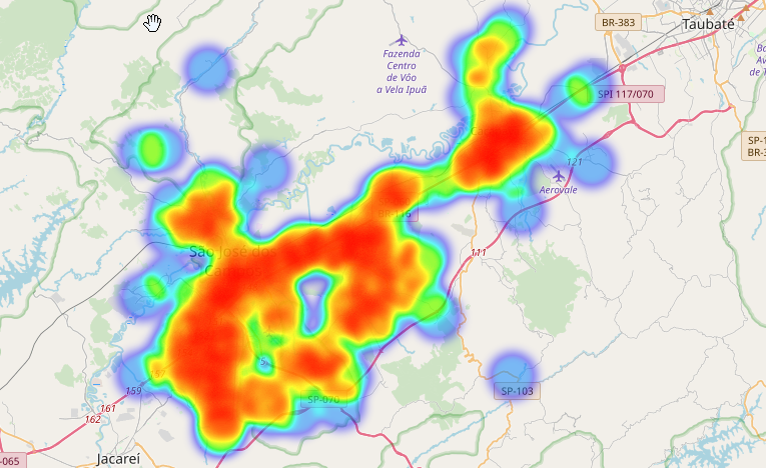

In [57]:
Image("Mapa_Calor_Roubo_SJC.png", width=950, height=850)

# OS 10 BAIRROS COM MAIORES OCORRÊNCIAS

O bairro do Parque Industrial lidera o ranking e é interessante observar que 6 bairros da Zonal Sul de São José dos Campos estão entre os 10 bairros que tiveram mais vítimas.

In [44]:
dados_roubo['BAIRRO'].value_counts().head(10)

CENTRO                   51
AREA RURAL               31
EUGÊNIO DE MELO          28
PARQUE INDUSTRIAL        22
BOSQUE DOS EUCALIPTOS    21
CHÁCARAS REUNIDAS        20
JARDIM MORUMBI           16
JARDIM SATÉLITE          15
PARQUE INTERLAGOS        14
RES ESPERANÇA            13
Name: BAIRRO, dtype: int64

A fim de corroborar com os dados apresentados, segue trecho da matéria do jornal "O VALE" de 7 de Dezembro:
" As regiões sul e leste de São José dos Campos concentram a maioria dos crimes contra o patrimônio na cidade, respondendo por 71,94% dos roubos de veículo e por 53,47% dos furtos de veículo.
Entre janeiro e outubro deste ano, São José registrou 577 roubos de veículos, sendo 249 na zona leste e 210 na sul. Terceira colocada, a região central anotou 57 roubos de veículos. Os dados são da SSP (Secretaria de Estado da Segurança Pública). Quanto ao furto de veículos, com 1.837 ocorrências em 10 meses na cidade, a zona sul lidera com 810, a central tem 414 e a leste 323. A zona sul é líder absoluta em roubos e furtos em geral, com 903 e 1.402 ocorrências, respectivamente 33,15% e 26,14% de toda a cidade, que registrou 2.456 roubos e 4.747 furtos. No segundo lugar, em roubos, vem a zona leste (624) e em furtos, a região central (1.352)."

link: https://www.ovale.com.br/_conteudo/2018/12/pagina3/62276-zonas-sul-e-leste-de-sao-jose-tem-mais-roubos-diz-mapa-do-crime.html

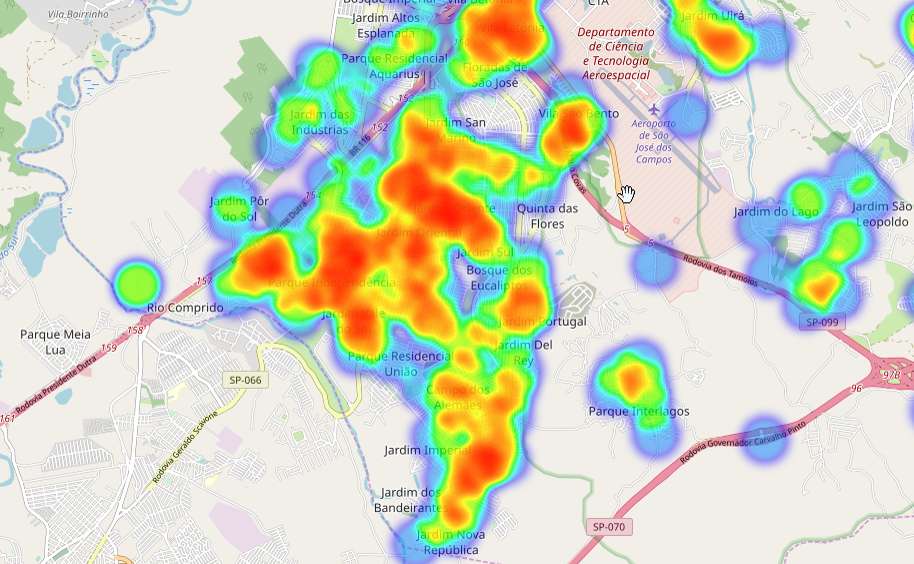

In [45]:
Image("Mapa_Calor_Roubo_Zona_Sul_SJC.png", width=950, height=850)

# VEÍCULOS MAIS ROUBADOS

Segue uma demonstração dos tipos de veículos preferidos pelos bandidos. Conforme apresentado, o automóvel (carro) lidera este ranking, seguida das motos.

Text(0, 0.5, ' ')

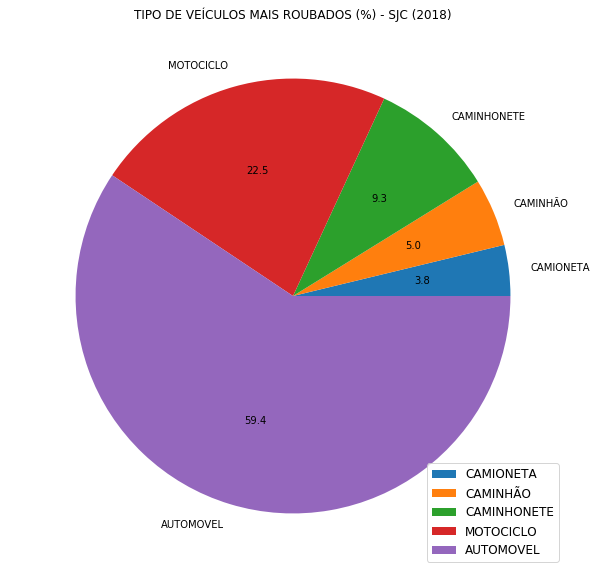

In [46]:
dados_roubo.groupby('DESCR_TIPO_VEICULO').size().sort_values().tail().plot(kind='pie', figsize=(10,10),autopct='%.1f')
plt.legend(loc = 'lower right', fontsize = 'large')
plt.title('TIPO DE VEÍCULOS MAIS ROUBADOS (%) - SJC (2018)')
plt.ylabel(' ')

Para informação e curiosidade, muitos dicionários trazem as palavras caminhonete e camioneta como palavras sinônimas, mas o Código Nacional de Trânsito apresenta estes temos como classificações distintas, pois considera caminhonete um veículo que possui uma cabine para o motorista e mais dois passageiros e uma carroceria traseira para o transporte de carga, até um peso bruto total de 3.500Kg, ou seja, um veículo que transporta carga e passageiros em compartimentos individualizados e sem comunicação interna entre si, como a S10 e a Ford Ranger, e aborda camioneta como um veículo destinado ao transporte de passageiros e de carga no mesmo compartimento, ou seja, passageiros e a carga coexistem em um mesmo espaço, como por exemplo, a Blazer e a Pajero. 

link: https://transitoeconhecimento.wordpress.com/2013/08/28/distines-entre-camioneta-caminhonete-e-utilitrio/

#  CORES DE VEÍCULOS MAIS ROUBADOS

Observado que os dados de cores de veículos mais roubados em São José dos Campos coincidem com a Grande São Paulo, conforme apuração de dados efetuado pela revista Exame, onde as cores prata, preta e branca lideram o ranking.  

link: https://exame.abril.com.br/seu-dinheiro/os-carros-cores-e-horarios-preferidos-pelos-ladroes/ 

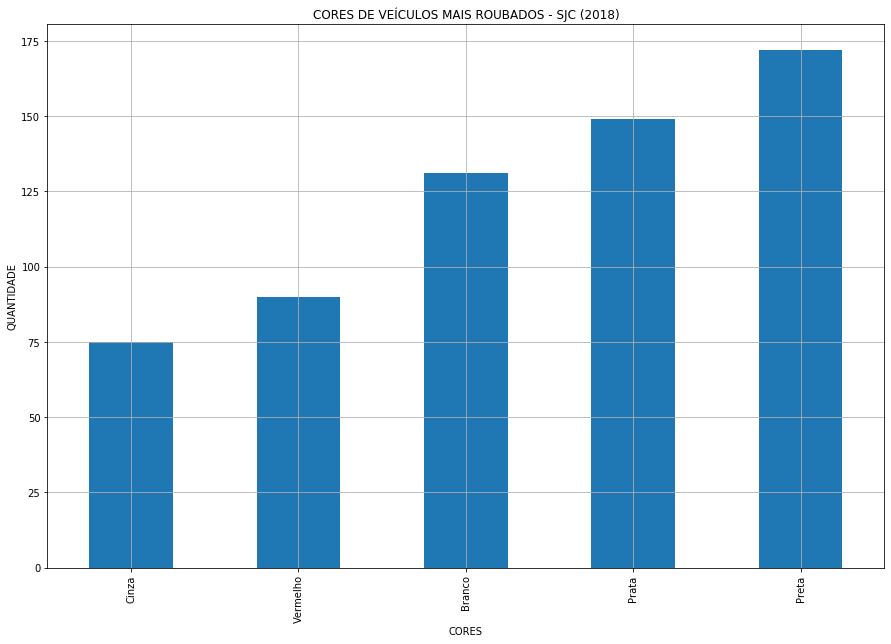

In [47]:
dados_roubo.groupby('DESCR_COR_VEICULO').size().sort_values().tail(5).plot(kind='bar', figsize=(15,10), fontsize = 'medium')
plt.title('CORES DE VEÍCULOS MAIS ROUBADOS - SJC (2018)')
plt.ylabel('QUANTIDADE')
plt.xlabel('CORES')
plt.grid(True, which='major')

Os carros com cores mais chamativas são evitados pelos ladrões por dois motivos: a maior facilidade de localização do veículo depois de roubado; e a menor procura no mercado paralelo, tanto por conta da maior dificuldade de revenda (por serem carros que não agradam a todos os gostos), quanto pelo fato de as peças coloridas serem menos buscadas para reposição. Segundo o Capitão Cleodato Moisés do Nascimento, porta-voz da Polícia Militar de São Paulo,  “O criminoso evita cores mais chamativas. Já os carros com cores padrão, como branco, preto e prata, são os preferidos, porque se misturam na intensidade dos outros veículos em uma fuga e são mais buscados no mercado negro”.

link: https://exame.abril.com.br/seu-dinheiro/10-coisas-que-os-ladroes-nao-gostam-nos-carros/

# CIDADE DE ORIGEM DOS VEÍCULOS ROUBADOS

Segue abaixo, o ranking (10 posições) das cidades de origem dos veículos mais roubados em São José dos Campos. 

In [48]:
dados_roubo['CIDADE_VEICULO'].value_counts().head(10)

SÃO JOSÉ DOS CAMPOS    400
CAÇAPAVA                78
JACAREI                 23
S.PAULO                 22
TAUBATÉ                 17
SAO PAULO               12
BELO HORIZONTE           8
PINDAMONHANGABA          5
CARAGUATATUBA            5
GUARULHOS                3
Name: CIDADE_VEICULO, dtype: int64

Em princípio foi estranho visualizar a cidade de Cacapava (91000 habitantes) aparecer em 2º lugar no ranking, bem a frente de Jacareí (187000 habitantes), além do que Jacareí está aproximadamente 25 km mais próxima de São José dos Campos do que Cacapava. Após pesquisa, verificou-se que Caçapava não tem uma Delegacia Seccional e desta forma, os boletins ficam registrados na Delegacia Seccional de São José dos Campos, ou seja, muitos dos roubos ocorreram na própria cidade de Cacapava, mas ficam no banco de dados de São José dos Campos. Vide abaixo, imagem da mapa de calor dos roubos em Cacapava.

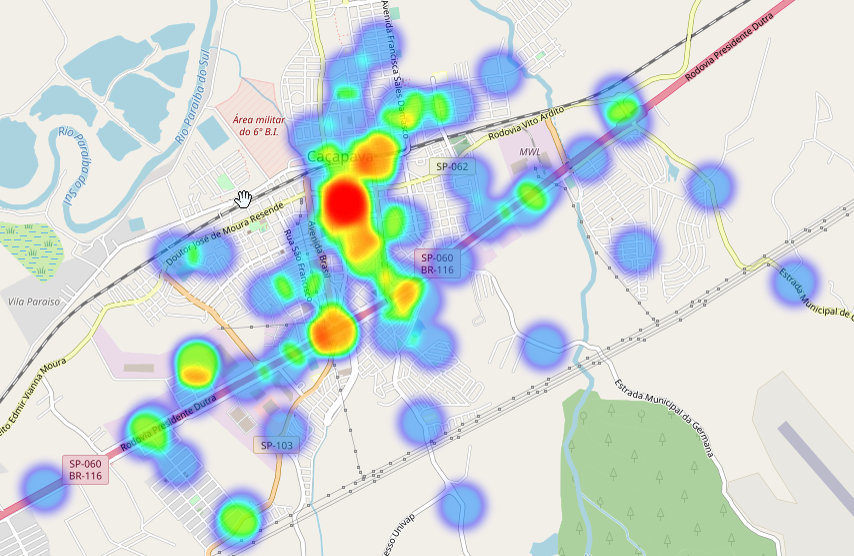

In [49]:
Image("Mapa_Calor_Roubos_Cacapava.png", width=950, height=850)

# PERÍODOS DOS ROUBOS

Observado que os períodos de maior ocorrência de roubos, também coincidem com a Grande São Paulo. 

link: https://exame.abril.com.br/seu-dinheiro/os-carros-cores-e-horarios-preferidos-pelos-ladroes/

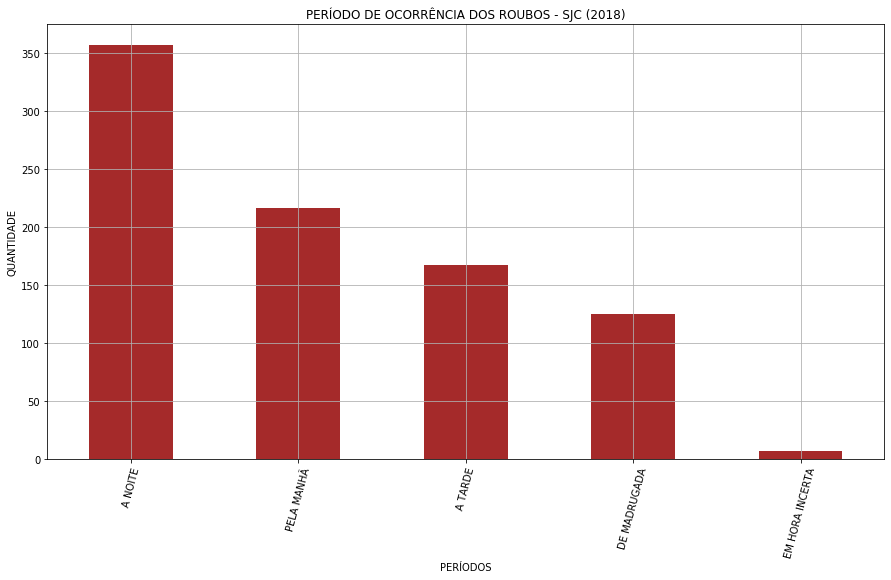

In [50]:
dados_roubo.groupby('PERIODO_DE_OCORRENCIA').size().sort_values(ascending=False).plot(kind= 'bar', figsize=(15,8), rot=75, color='brown')
plt.title('PERÍODO DE OCORRÊNCIA DOS ROUBOS - SJC (2018)')
plt.ylabel('QUANTIDADE')
plt.xlabel('PERÍODOS')
plt.grid(True, which='major')

# MODELOS MAIS VISADOS PARA ROUBO

Os gráficos abaixo mostram realmente que as motos são os veículos mais roubados, como já se era de esperar. O que causou certa estranheza foi notar que na categoria automóvel, o HB20 foi o modelo preferido para roubo em São José dos Campos.

Após pesquisa, conforme dados da SUSEP, verificou-se que o HB20 está em 3º lugar dos carros mais roubados até Outubro de 2018 no cenário nacional, levando-se em consideração o número de sinistros em relação ao número de veículos com cobertura de seguro contratada. Talvez um dos motivos, seja por conta que o HB20 foi o 2º carro novo em seu segmento, mais vendido em 2018 com 105506 unidades, abaixo somente do Onix com 210458 unidades, ou seja, quanto mais carros deste modelo rodando, maior a possibilidade de repasse de peças, oriundas de carros roubados. 

link: https://montesuacentral.com.br/carros-mais-roubados-de-2018/

link: https://revistaautoesporte.globo.com/Noticias/noticia/2019/01/os-carros-mais-vendidos-de-2018.html

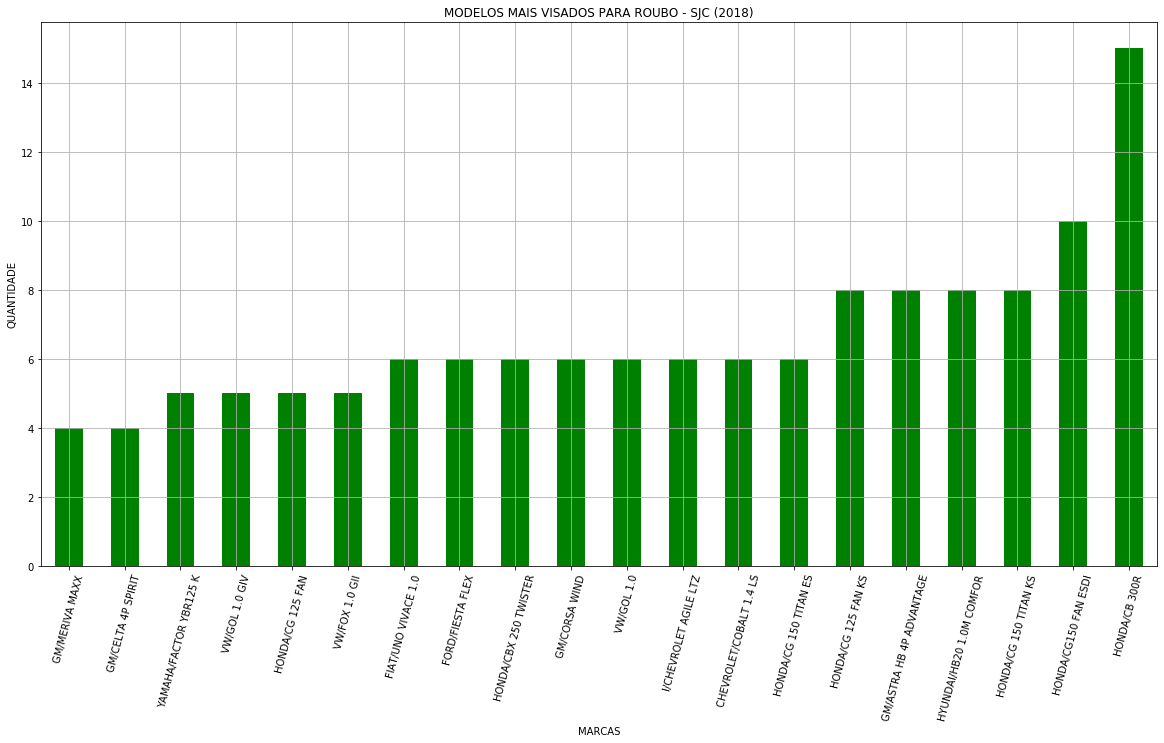

In [51]:
dados_roubo.groupby('MARCA_DO_VEICULO').size().sort_values(ascending=True).tail(20).plot(kind='bar', rot=75, figsize=(20,10), color='green')
plt.title('MODELOS MAIS VISADOS PARA ROUBO - SJC (2018)')
plt.ylabel('QUANTIDADE')
plt.xlabel('MARCAS')
plt.grid(True, which='major')

In [52]:
dados_roubo['MARCA_DO_VEICULO'].value_counts().head(10)

HONDA/CB 300R               15
HONDA/CG150 FAN ESDI        10
HYUNDAI/HB20 1.0M COMFOR     8
HONDA/CG 150 TITAN KS        8
HONDA/CG 125 FAN KS          8
GM/ASTRA HB 4P ADVANTAGE     8
HONDA/CBX 250 TWISTER        6
FORD/FIESTA FLEX             6
GM/CORSA WIND                6
CHEVROLET/COBALT 1.4 LS      6
Name: MARCA_DO_VEICULO, dtype: int64

# CLASSIFICAÇÃO DA AUTORIA DO ROUBO

Intrigante constatar que 61 vítimas conheciam o criminoso, conforme dados abaixo:

In [53]:
dados_roubo['BO_AUTORIA'].value_counts()

Desconhecida    807
Conhecida        61
Ignorado          4
Name: BO_AUTORIA, dtype: int64

# ANOS DE FABRICAÇÃO MAIS VISADOS

A preferência dos criminosos são por carros mais novos, conforme pode-se notar nos dados abaixo.
Obs.: Muitos boletins de ocorrência atribuíram o valor "0" para o ano.

In [54]:
dados_roubo['ANO_MODELO'].value_counts()


0.0       203
2014.0     72
2012.0     70
2010.0     62
2015.0     56
2011.0     56
2013.0     52
2018.0     40
2016.0     35
2008.0     32
2007.0     29
2009.0     25
2017.0     23
2006.0     19
2001.0     11
2005.0     11
1999.0      7
2002.0      7
2003.0      7
2000.0      5
2004.0      5
1998.0      5
1995.0      4
2019.0      3
1988.0      3
1996.0      3
1997.0      3
1990.0      2
1991.0      1
1989.0      1
1994.0      1
1980.0      1
1977.0      1
1993.0      1
Name: ANO_MODELO, dtype: int64

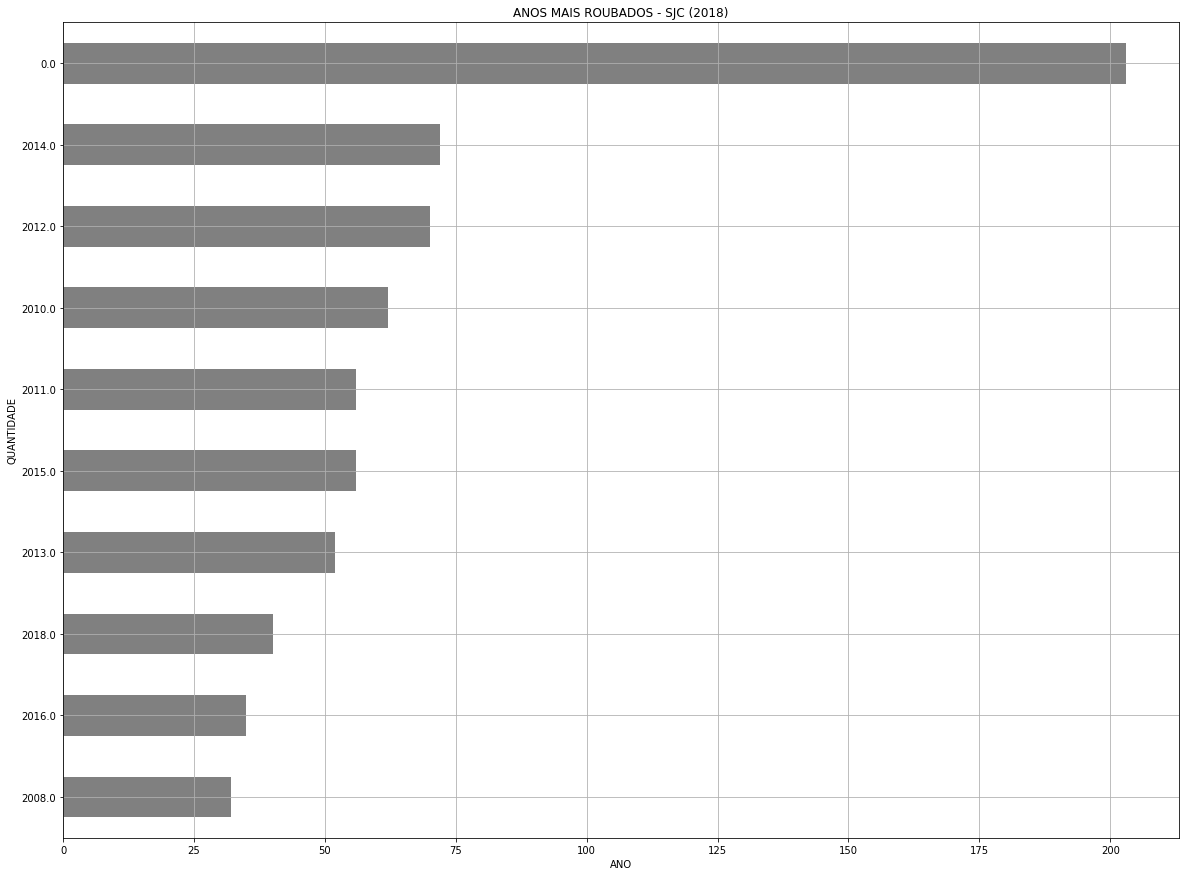

In [55]:
dados_roubo.groupby('ANO_MODELO').size().sort_values(ascending=True).tail(10).plot(kind='barh', rot=0, figsize=(20,15), color='gray')
plt.title('ANOS MAIS ROUBADOS - SJC (2018)')
plt.ylabel('QUANTIDADE')
plt.xlabel('ANO')
plt.grid(True, which='major')

# CONCLUSÕES SOBRE A ANÁLISE

Com os dados de roubo de veículos, foi possível mapear os bairros que talvez precisem de um patrulhamento maior da polícia ou avaliar se está faltando algo na região afetada, como por exemplo, a melhora do sistema de iluminação, o que inibe a ação de criminosos.

Foi possível também extrair informações de quais modelos de carros evitar numa compra. Trata-se de um assunto sensível, pois talvez o indivíduo faça uma reflexão do quanto vale correr um risco maior de ser vítima de um criminoso, ao se adquirir um veículo que tanto ele se empenhou em conquistar.

Estes foram apenas alguns exemplos de questionamentos e conclusões que se podem obter com a análise de dados, além de outras informações e curiosidades.

# CONCLUSÃO SOBRE A ATIVIDADE

Esta atividade foi um exercício muito interessante, pois foi uma introdução a uma ciência que tem se tornado muito importante para qualquer ramo de atividade, o Data Science. 

Muitas instituições e empresas possuem uma enorme quantidade de dados, mas muitas não fazem uso desta base ou simplesmente não sabem como manipulá-la e estudá-la de um modo eficiente e com isto perdem grandes oportunidades que estão ocultas. 

Se bem avaliada, uma base de dados é capaz de fornecer informações importantes para o mapeamento de cenários que podem prover respostas para tomada de decisões e assim melhorar significativamente um produto ou processo.

Com certeza, trata-se uma ciência que desejamos nos aprofundar.